In [13]:
import os
import numpy as np
import torch
import glob
import torch.nn as nn
from torchvision.transforms import transforms
from torch.utils.data import DataLoader,Dataset
from torch.optim import Adam
from torch.autograd import Variable
import torchvision
import pathlib
import sys

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
#checking for device
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [16]:
import torch
from torchvision import transforms, datasets
import pathlib


# Define the transforms to be applied on the images
transform = transforms.Compose([
    transforms.Resize(150),
    transforms.CenterCrop(150),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Load the train, validation, and test datasets
train_data = datasets.ImageFolder('/content/drive/MyDrive/arnouba.v2i.folder/train', transform=transform)
valid_data = datasets.ImageFolder('/content/drive/MyDrive/arnouba.v2i.folder/valid', transform=transform)
test_data = datasets.ImageFolder('/content/drive/MyDrive/arnouba.v2i.folder/test', transform=transform)

# Define the data loaders for batch processing
train_loader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=32)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=32)

root = pathlib.Path('/content/drive/MyDrive/arnouba.v2i.folder/train')
classes = sorted([j.name.split('/')[-1] for j in root.iterdir()])

print(classes)

['check', 'facture']


In [17]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 34 * 34, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 34 * 34)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
        net = Net()

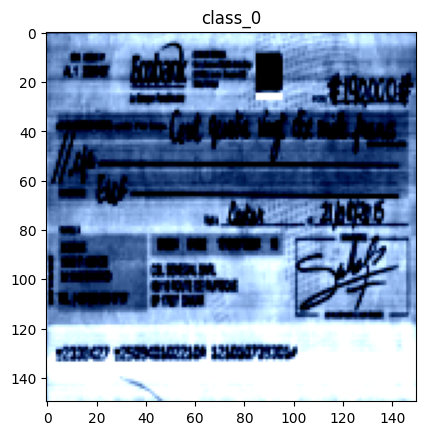

In [40]:
import matplotlib.pyplot as plt

# Visualize a sample image from the training data
sample_img, sample_label = next(iter(train_loader))
plt.imshow(sample_img[0].permute(1,2,0))
plt.title(classes[sample_label[0]])
plt.show()


In [20]:
import torch.optim as optim

net = Net()

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the optimizer
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Train the network on the training data
def train(net, train_loader, valid_loader, criterion, optimizer, epochs):
    for epoch in range(epochs):
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            if i % 100 == 99:    # print every 100 mini-batches
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 100))
                running_loss = 0.0

        # Validate the network on the validation data
        correct = 0
        total = 0
        with torch.no_grad():
            for data in valid_loader:
                images, labels = data
                outputs = net(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        print('Accuracy of the network on the validation images: %d %%' % (
            100 * correct / total))
    torch.save(net.state_dict(), 'model.pt')
    print('Finished Training')




In [21]:
# Test the network on the test data
def test(net, test_loader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the test images: %d %%' % (
        100 * correct / total))

# Train the network on the training data
net = Net()
epochs = 10
train(net, train_loader, valid_loader, criterion, optimizer, epochs)

# Test the network on the test data
test(net, test_loader)

Accuracy of the network on the validation images: 66 %
Accuracy of the network on the validation images: 66 %
Accuracy of the network on the validation images: 66 %
Accuracy of the network on the validation images: 66 %
Accuracy of the network on the validation images: 66 %
Accuracy of the network on the validation images: 66 %
Accuracy of the network on the validation images: 66 %
Accuracy of the network on the validation images: 66 %
Accuracy of the network on the validation images: 66 %
Accuracy of the network on the validation images: 66 %
Finished Training
Accuracy of the network on the test images: 45 %


In [39]:
# Load the trained model
model_path = '/content/model.pt'
model = Net()
model.load_state_dict(torch.load(model_path))
model.eval()

# Load the image and apply the same transformation used for training
from PIL import Image

image_path = '/content/drive/MyDrive/arnouba.v2i.folder/test/check/20150827-SN094SN0941110094390011070557Recto_jpg.rf.b1d6862db8553bf79fb744bf5044eb6c.jpg'
image = Image.open(image_path)
transform = transforms.Compose([
    transforms.Resize(150),
    transforms.CenterCrop(150),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])
input_tensor = transform(image).unsqueeze(0)

# Make a prediction using the model
with torch.no_grad():
    output = model(input_tensor)
_, predicted = torch.max(output.data, 1)

# Print the predicted class
classes = ['class_0', 'class_1']  # replace with your actual class names
print('Predicted class:', classes[predicted.item()])

Predicted class: class_1
